In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Tuning the parameters of a DecisionTreeClassifier

In [2]:
'''
The grid search provided by GridSearchCV exhaustively generates candidates 
from a grid of parameter values specified in a grid of values
'''

#IMPORTS
#sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, roc_auc_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#plots
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt

import pandas as pd

In [3]:
#IMPORT DATA
df = pd.read_csv('diabetes.txt')
df = df.as_matrix()
X=df[:,0:-1] 
y=df[:,-1]

In [4]:
#DEFINE CLASSIFIERS LIST AND PARAMETERS GRIDS

classifier = DecisionTreeClassifier() #class_weight='balanced'
parameters_DS = {'criterion':['gini','entropy'], 'min_samples_leaf':[10,20,30,50,60,70], 'max_depth':[3,5,10,None]} #If float, then min_samples_leaf is a percentage 

In [5]:
#SPLIT DATA INTO TRAINING/TEST SET 80-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

CLASSIFIER:  <class 'sklearn.tree.tree.DecisionTreeClassifier'>
Wall time: 1.62 s


***GRIDSEARCH RESULTS***
Best score: 0.619712 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50}
0.526243 (0.073026) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.542650 (0.056162) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.529866 (0.062007) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30}
0.583135 (0.032803) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.557001 (0.017518) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 60}
0.574601 (0.022868) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 70}
0.576274 (0.063507) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
0.582837 (0.033760) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
0.582974 (0.043504) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30}
0.58313

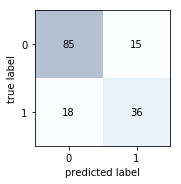

In [6]:
#GRIDSEARCH on TRAIN with CV=3 and scoring=accuracy 

#gridsearch the best params and retrain on all training set 
print('CLASSIFIER: ', str(type(classifier)))

#defining a gridsearch
gs = GridSearchCV(classifier, parameters_DS, cv=3, scoring = 'f1', verbose=0, n_jobs=-1, refit=True)
# GS uses a Stratified K-Folds cross-validator: The folds are made by preserving the percentage of samples for each class.
# if refit=True the model is retrained on the whole training set with the best found params

%time gs = gs.fit(X_train, y_train)
print('\n')

# summarize results
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print('\n')

#test on test set
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

#print out some metrics
print('***RESULTS ON TEST SET***')
print("accuracy_score",accuracy_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print("roc_auc_score",roc_auc_score(y_test, y_pred))
print('\n')

print(classification_report(y_test, y_pred))
print('\n')
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show() 